# Linear Networks Concise 
(using torch.nn and data loaders)

In [ ]:
import torch
from torch.utils import data
import matplotlib.pyplot as plt
import random
from torch import nn

## Generating data

In [ ]:
def synthetic_data_generator(weight, bias, n_samples) :
  """Method to generate data for Linear Regression given weight and bias"""
  
  # Creating normal data
  X = torch.normal(0, 1, (n_samples, len(weight)))
  # Multiplying normal data with weight and adding bias
  y = torch.matmul(X, torch.tensor(weight)) + torch.tensor(bias)
  # Adding noise to the data
  y += torch.normal(0, 0.01, y.shape)

  return X, y.reshape(-1, 1)

In [ ]:
weights = [2, 3.4, -1.2]
bias = 0.2
samples = 100

In [ ]:
X, y = synthetic_data_generator(weights, bias, samples)

print(X.shape)
print(y.shape)

torch.Size([100, 3])
torch.Size([100, 1])


## Visualizing the data relations

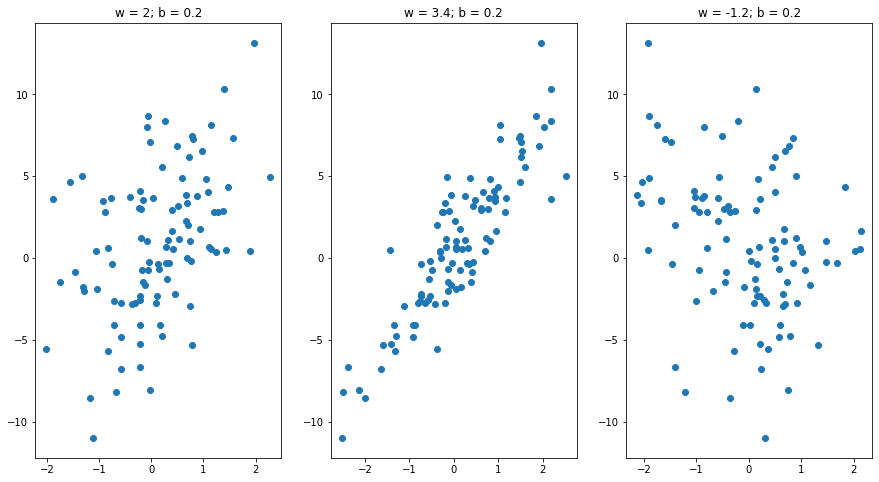

In [ ]:
plt.figure(figsize=(5*(len(weights)),8))
for ind, weight in enumerate(weights):
  plt.subplot(1, len(weights), ind+1) 
  plt.scatter(X[:, ind], y.flatten())
  plt.title(f"w = {weight}; b = {bias}")
plt.show()

## Sampler (New)

In [ ]:
def load_array(data_arrays, batch_size, is_train=True) :
  dataset = data.TensorDataset(*data_arrays)
  return data.DataLoader(dataset, batch_size, shuffle=is_train)

In [ ]:
batch_size = 10

for f ,l in load_array((X, y), batch_size) :
  print(f, "\n", l)
  break

tensor([[ 1.4369, -1.4354, -1.9271],
        [ 0.7720, -1.6021,  1.3284],
        [-0.1904,  0.7342,  0.9043],
        [ 1.5709,  1.4604,  0.8454],
        [-0.2112, -0.5792,  0.2836],
        [-1.4537,  0.4043, -0.4394],
        [ 0.5236, -0.1720, -0.4343],
        [-0.5750, -1.6320,  0.2250],
        [ 0.7112, -0.3706, -1.4073],
        [-0.0425,  0.4209,  1.4646]]) 
 tensor([[ 0.5056],
        [-5.2969],
        [ 1.2272],
        [ 7.3018],
        [-2.5354],
        [-0.8195],
        [ 1.1839],
        [-6.7674],
        [ 2.0508],
        [-0.2211]])


## Model

In [ ]:
net = nn.Sequential(
    nn.Linear(3, 1)
)

loss = nn.MSELoss()
optimizer = torch.optim.SGD(net.parameters(), lr = 0.05)

In [ ]:
num_epochs = 10
batch_size = 10
train_data = load_array((X, y), batch_size)

losses = []

for epoch in range(num_epochs) :
  for f, l in train_data :
    l = loss(net(f), l)
    optimizer.zero_grad()
    l.backward()
    optimizer.step()
  
  l = loss(net(X), y)
  losses.append(float(l))
  print(f"Epoch : {epoch} ; Loss : {l:f}")

Epoch : 0 ; Loss : 2.088061
Epoch : 1 ; Loss : 0.230606
Epoch : 2 ; Loss : 0.039844
Epoch : 3 ; Loss : 0.008387
Epoch : 4 ; Loss : 0.001899
Epoch : 5 ; Loss : 0.000486
Epoch : 6 ; Loss : 0.000168
Epoch : 7 ; Loss : 0.000101
Epoch : 8 ; Loss : 0.000086
Epoch : 9 ; Loss : 0.000082


## Plot

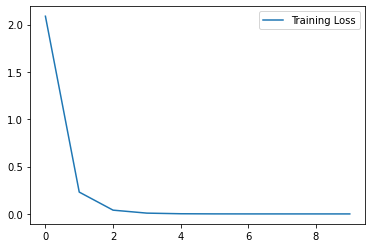

In [ ]:
plt.plot(losses, label="Training Loss")
plt.legend()
plt.show()

## Comparison of true vs predicted weights

In [ ]:
print(weights)
net[0].weight.tolist()[0]

[2, 3.4, -1.2]


[1.999610185623169, 3.4003777503967285, -1.2002230882644653]

In [ ]:
print(bias)
net[0].bias.tolist()[0]

0.2


0.20135824382305145